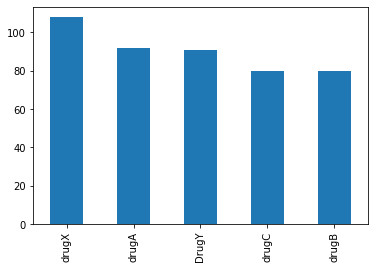

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("drug200.csv")
# df = df.drop(df[df['Na_to_K'] > 35].index)
df_a = df[df['Drug'] == 'drugA']
df_b = df[df['Drug'] == 'drugB']
df_c = df[df['Drug'] == 'drugC']
df_x = df[df['Drug'] == 'drugX']

df = pd.concat([df, df_a, df_a, df_a])
df = pd.concat([df, df_b, df_b, df_b, df_b])
df = pd.concat([df, df_c, df_c, df_c, df_c])
df = pd.concat([df, df_x])



_ = df.Drug.value_counts().plot(kind='bar')

In [2]:
X = df.drop('Drug', axis=1)
y = df['Drug']

le = LabelEncoder()

X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=24)

unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([62, 64, 56, 62, 71]))

In [3]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

df_train = pd.DataFrame(X_train,index=X_train[:,0])
df_train

,0,1,2,3,4
0.156485,0.156485,-1.125250,0.330788,-0.871652,0.707213
-0.620798,-0.620798,0.888692,1.633264,1.147247,-1.289829
-1.138986,-1.138986,-1.125250,-0.971688,1.147247,0.075496
0.415579,0.415579,0.888692,0.330788,1.147247,2.357829
-1.786721,-1.786721,0.888692,0.330788,-0.871652,0.014362
...,...,...,...,...,...
0.221258,0.221258,-1.125250,1.633264,1.147247,-1.004537
-1.398080,-1.398080,0.888692,0.330788,-0.871652,-1.228695
1.646275,1.646275,0.888692,0.330788,-0.871652,0.951748
-1.138986,-1.138986,-1.125250,0.330788,-0.871652,0.605323


In [4]:
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

In [5]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.92      0.38      0.54        29
           1       0.74      1.00      0.85        28
           2       0.83      1.00      0.91        24
           3       0.86      1.00      0.92        18
           4       1.00      0.97      0.99        37

    accuracy                           0.86       136
   macro avg       0.87      0.87      0.84       136
weighted avg       0.88      0.86      0.84       136



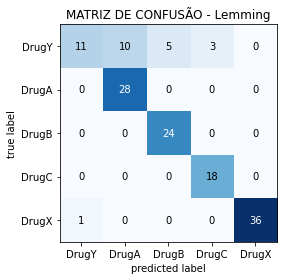

In [6]:
c_matriz = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=c_matriz)
plt.title('MATRIZ DE CONFUSÃO - Lemming')

ticks = ['DrugY', 'DrugA', 'DrugB', 'DrugC', 'DrugX']
n_ticks = [0, 1, 2, 3, 4]
ax.set_xticks(n_ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(n_ticks)
ax.set_yticklabels(ticks)

plt.savefig('MatrizConfusão.png', format='png')
plt.show()